#  CHURN  PREDICTION BY APPLYING VARIOUS CLASSIFICATION MODELS.

Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.

You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.

In [1]:
#importing the required libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# defining the path and importing the dataset
ds = pd.read_csv(r"C:\Users\umesh\Desktop\Praxis BS\1st Term\Power BI\E21023\telecom.csv")

In [3]:
#
ds.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
#reviewing dataset
pd.set_option('display.max_columns',None)
ds.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [5]:
# checking the feature and datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


 As we can see above that "TotalCharges" are in string datatype so we convert it into float datatype

In [6]:
# using pandas we convert the string datatype into float64 datatype
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'],errors = 'coerce')

Similarly SeniorCitizen ar in integer format need to convert it into string datatype

In [7]:
# using pandas we convert the integer datatype into string datatype
ds['SeniorCitizen'] = ds['SeniorCitizen'].astype(str)

In [8]:
# again checking the datatype for confirmation
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   object 
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


As we can se column customer ID and and unnamed column is not necessary, hence dropping the unnecessary column 

In [9]:

#dropping the Unnamed: 0 and customerID column 
ds.drop("Unnamed: 0", axis= 1, inplace = True)
ds.drop("customerID", axis= 1, inplace = True)

In [10]:
# checking numbers of rows and columns in the dataset
ds.shape

(5986, 20)

After this need to check if the dataset conatins any null value or not , if null values re present need to treat 
that and fill the null values 

In [11]:
# finding the null values
ds.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [12]:
# As we can se 10 null values in TotalCharges need to fill that
ds.TotalCharges

0       1734.65
1       3973.20
2       2869.85
3        238.50
4        119.50
         ...   
5981      95.00
5982    2198.30
5983     306.05
5984    1200.15
5985     457.30
Name: TotalCharges, Length: 5986, dtype: float64

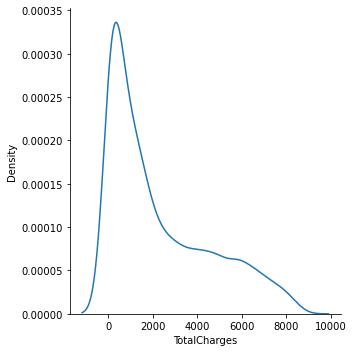

In [13]:
# plotting the graph of TotalCharges 
sns.displot(ds, x="TotalCharges", kind="kde")
plt.show()

In [14]:
# finding the median value 
np.median(ds.TotalCharges)

nan

In [15]:
# As data contains null value , skiping the null values and finding the median
ds.TotalCharges.median(skipna=True)

1412.15

In [16]:
# finding the mean value 
np.mean(ds.TotalCharges)


2298.0606174698796

Appling the mean values in replacement of null values

In [17]:
# filling mean value in place of null values
ds["TotalCharges"] = ds["TotalCharges"].fillna(np.mean(ds.TotalCharges))

In [18]:
# confirming the null value in dataset
ds.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2298.060617
std,24.516391,30.114702,2272.226516
min,0.000000,18.250000,18.800000
25%,9.000000,35.650000,406.275000
50%,29.000000,70.400000,1414.550000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


We observe that in above columns other than tenure, MonthlyCharges, TotalCharges are all categorical columns



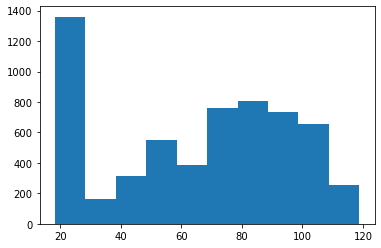

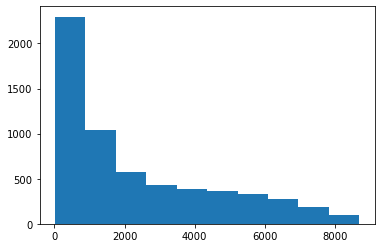

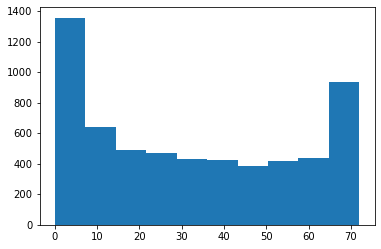

In [20]:

# plotting the histogram of MonthlyCharges
plt.hist(ds.MonthlyCharges)
plt.show()

# plotting the histogram of TotalCharges
plt.hist(ds.TotalCharges)
plt.show()

# plotting the histogram of tenure
plt.hist(ds.tenure)
plt.show()



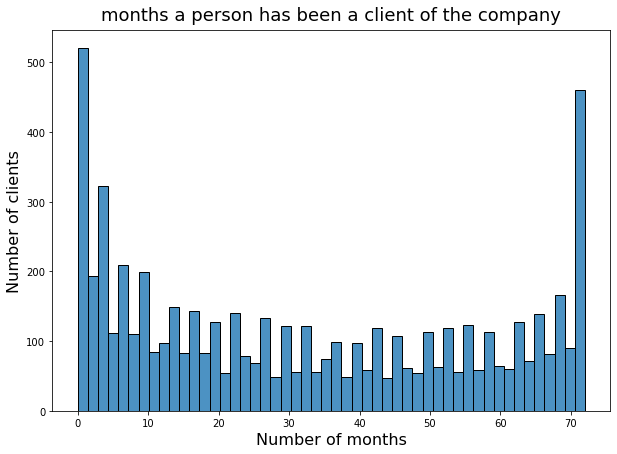

In [21]:
tenure = ds['tenure']
plt.figure(figsize=(10, 7))
sns.histplot(tenure, bins=50, alpha=0.8)
plt.title('months a person has been a client of the company', fontsize=18, pad=10)
plt.xlabel('Number of months', fontsize=16)
plt.ylabel('Number of clients', fontsize=16)
plt.show()


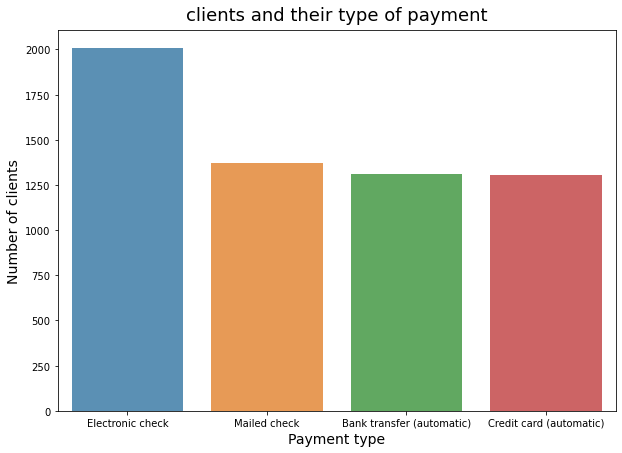

In [22]:
PaymentMethod = ds['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=PaymentMethod.index, y=PaymentMethod.values, alpha=0.8)
plt.title('clients and their type of payment', fontsize=18, pad=10)
plt.ylabel('Number of clients', fontsize=14)
plt.xlabel('Payment type', fontsize=14)
plt.show()

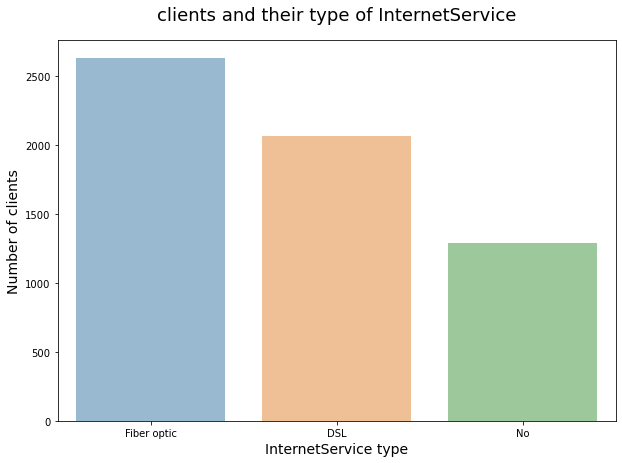

In [23]:
InternetService = ds['InternetService'].value_counts()
plt.figure(figsize=(10, 7))
sns.barplot(x=InternetService.index, y=InternetService.values, alpha=0.5)
plt.title('clients and their type of InternetService', fontsize=18, pad=20)
plt.ylabel('Number of clients', fontsize=14)
plt.xlabel('InternetService type', fontsize=14)
plt.show()

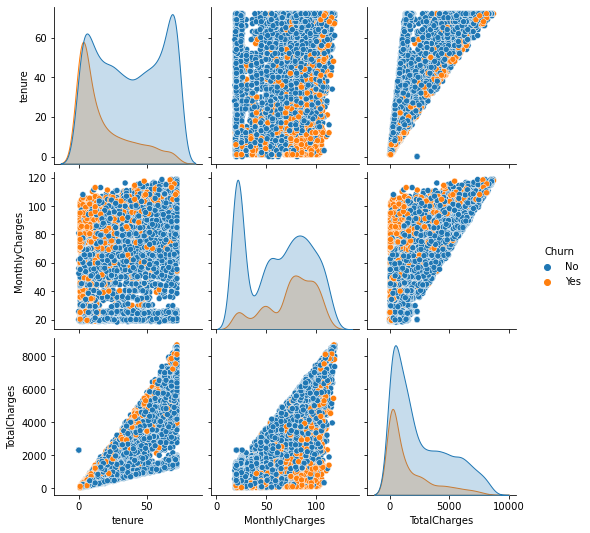

In [24]:
sns.pairplot(ds,hue = 'Churn')

<AxesSubplot:>

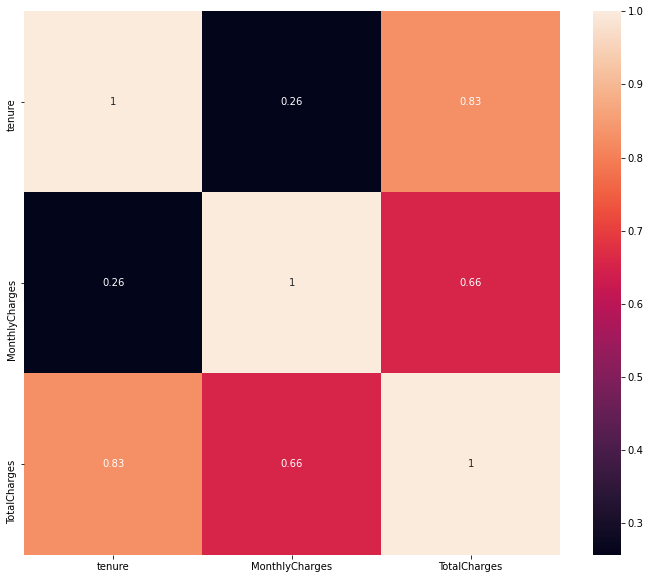

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr(),annot=True)

As we have seen there are many catrgorical data which need to convert readable format, for this we can use onehot encoding or lable encoder 

* We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)

The number of categorical features is less so one-hot encoding can be effectively applied

* We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)

The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [26]:
#taking care of categorical values we use label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat = list(ds.dtypes[ds.dtypes == object].index)
for i in cat:
    ds[i]=le.fit_transform(ds[i])

In [27]:
ds.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


In [28]:
#defining dependent and independent variables
x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [29]:
#splitting data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


### KNeighborsClassifier Model

In [31]:
#instantiate learning model (k=3)
knn = KNeighborsClassifier(n_neighbors=10)  #3NN

#fitting the model
knn.fit(x_train , y_train)
  
y_pred = knn.predict(x_test)
#confusion matrix
c = confusion_matrix(y_test, y_pred)
    
knna = ((c[0,0]+c[1,1]) / np.sum(c))
print(knna)


0.7754590984974958


### DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [34]:
# Making Prediction
y_pred = clf_gini.predict(x_test)
print(y_pred)
#confusion matrix
c = confusion_matrix(y_test, y_pred)
print(c)
# Over all accuarcy
dta = (c[0,0]+c[1,1])/np.sum(c)
print(dta)

[0 0 0 ... 0 0 0]
[[819  64]
 [198 117]]
0.7813021702838063


### RandomForestClassifier

In [35]:
#training model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf.fit(x_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
rfa = accuracy_score(y_test,y_pred)
print('accuracy score = ',accuracy_score(y_test,y_pred))

confusion matrix:
 [[799  84]
 [175 140]]
accuracy score =  0.7838063439065108


<BarContainer object of 3 artists>

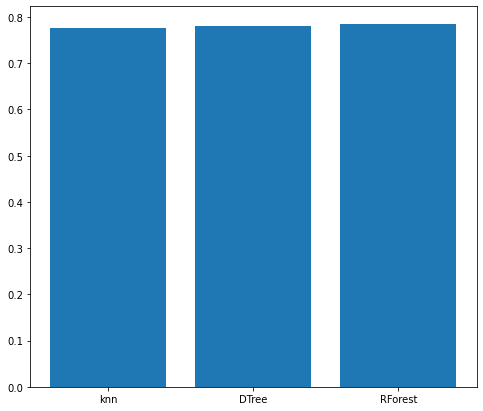

In [36]:
#comparing accuracies
plt.figure(figsize= (8,7))
ac = [knna,dta,rfa]
name = ['knn','DTree', 'RForest']
plt.bar(name,ac)

AS YOU CAN SEE THE VARIOUS ACCURACIES, AMONG WHICH DecisionTreeClassifier DID BEST